## EMPLOYEE DATABASE              
##### 2019 cohort Data Science :  MING GAO

1. set up dependencies

In [1]:
import psycopg2 as p
import pandas as pd
import matplotlib.pyplot as plt

2. Data retrieval from postsgreSQL 

In [2]:
# Connect to postgreSQL database and read table salaries and titles in pandas
#(dbname= database name in postgreSQL, password= password for postgreSQL server login)
conn=p.connect("dbname=EMPLOYEE_SQL user=postgres host=localhost password=<######>")
data_s = pd.read_sql("SELECT * FROM salaries", conn)
data_t= pd.read_sql("SELECT * FROM titles", conn)

# Check salaries table
data_s.head()

,emp_no,salary,from_date,to_date
0,10001,"$60,117.00",1986-06-26,1987-06-26
1,10002,"$65,828.00",1996-08-03,1997-08-03
2,10003,"$40,006.00",1995-12-03,1996-12-02
3,10004,"$40,054.00",1986-12-01,1987-12-01
4,10005,"$78,228.00",1989-09-12,1990-09-12


In [3]:
data_t.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


3. Data formating and merging

In [4]:
# Coverting salary datatype from currency into float
data_s['salary']=data_s['salary'].replace({'\$': '', ',': ''},regex=True).astype(float)

# Merge salary and title tables
df=pd.merge(data_t,data_s, on='emp_no', how="left")

In [5]:
df

,emp_no,title,from_date_x,to_date_x,salary,from_date_y,to_date_y
0,10001,Senior Engineer,1986-06-26,9999-01-01,60117.0,1986-06-26,1987-06-26
1,10002,Staff,1996-08-03,9999-01-01,65828.0,1996-08-03,1997-08-03
2,10003,Senior Engineer,1995-12-03,9999-01-01,40006.0,1995-12-03,1996-12-02
3,10004,Engineer,1986-12-01,1995-12-01,40054.0,1986-12-01,1987-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01,40054.0,1986-12-01,1987-12-01
...,...,...,...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29,49597.0,1987-08-30,1988-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01,49597.0,1987-08-30,1988-08-29
443305,499998,Senior Staff,1998-12-27,9999-01-01,40000.0,1993-12-27,1994-12-27
443306,499998,Staff,1993-12-27,1998-12-27,40000.0,1993-12-27,1994-12-27


4. Data visulization 

Text(0, 0.5, 'Frequency')

<Figure size 1224x720 with 0 Axes>

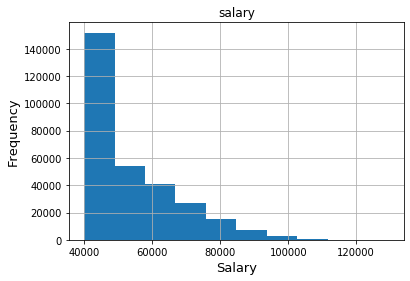

In [6]:
# Histogram to visualize the most common salary ranges for employees
fig=plt.figure(figsize=(17,10))
data_s.hist(column="salary")
plt.xlabel("Salary",fontsize=13)
plt.ylabel("Frequency",fontsize=13)

In [7]:
# Check mode of all salary values
data_s['salary'].mode()

0    40000.0
dtype: float64

Text(0, 0.5, 'Average Salary')

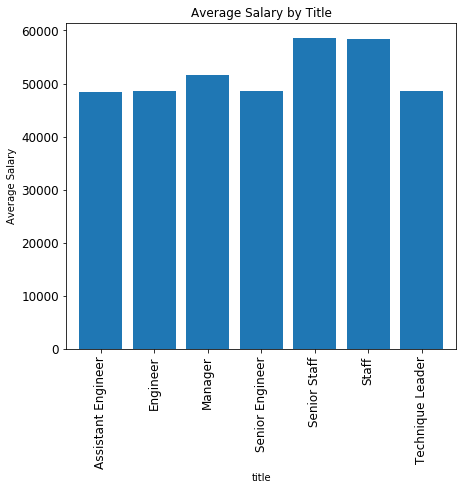

In [8]:
# Bar chart of average salary by title
df.groupby('title')['salary'].mean().plot(kind='bar',figsize=(7,6), width=0.8, title="Average Salary by Title", fontsize=12)
plt.ylabel("Average Salary")